In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import scipy.stats as sp
import statsmodels.api as sm
from pandas.stats.api import ols
from datetime import datetime
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [49]:
import seaborn as sns
sns.set(context='notebook', style="ticks", color_codes=True)

In [50]:
chem = pd.read_csv("E:/PROJECTS/POWMOW/ChemTable.csv")

In [51]:
chem.columns

Index([u'StationID', u'Name', u'Drainage', u'Source', u'East', u'North',
       u'Elev', u'Date', u'Time', u'T', u'pH', u'Cond', u'Pick', u'GenUnit',
       u'GenJoin'],
      dtype='object')

In [148]:
gname = "GenUnit"

In [114]:
#chem = chem[chem[gname] <> "Mix"]

In [149]:
cnt = chem.groupby(gname)["Cond"].agg({'cnt':(lambda x: np.count_nonzero(~np.isnan(x)))})['cnt'].values[::-1]

In [116]:
cnt.index

Index([u'Carbonate', u'New Siliciclastic', u'Old Siliciclastic'], dtype='object', name=u'GenUnit')

In [146]:
labs = chem.groupby(gname)["Cond"].count().values[::-1]

In [136]:
labs

array([10, 14, 44], dtype=int64)

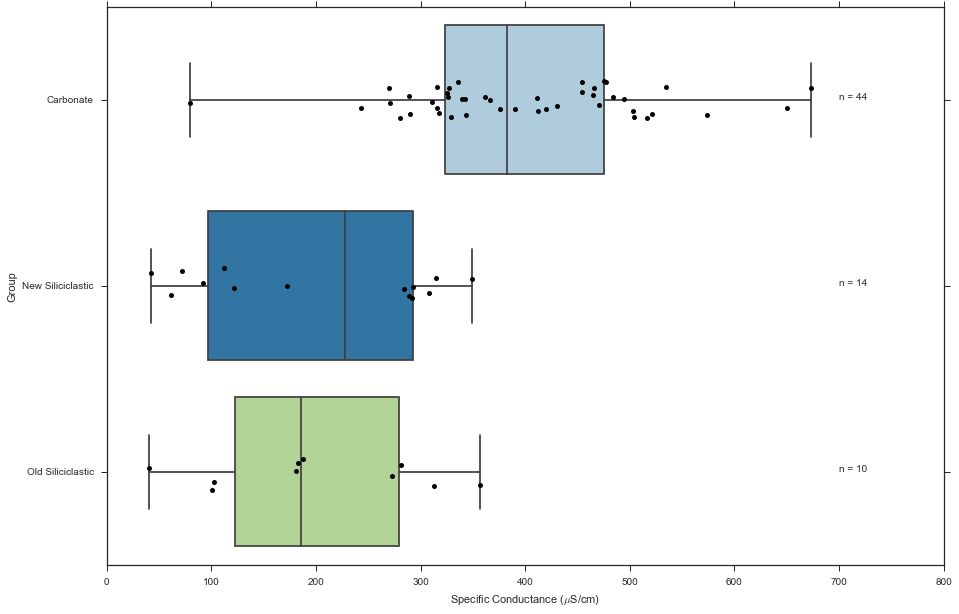

In [157]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="Cond", y=gname, data=chem,  whis=np.inf, palette="Paired")
sns.stripplot(x="Cond", y=gname, data=chem, jitter=True, size=5, color='black', linewidth=0)
for i in range(len(chem.groupby(gname))):
    plt.text(700, i, "n = " + str(cnt[-1-i]))
plt.xlabel("Specific Conductance ($\mu$S/cm)")
plt.ylabel("Group")
plt.savefig('E:/PROJECTS/POWMOW/CondBoxPlots.pdf')
    

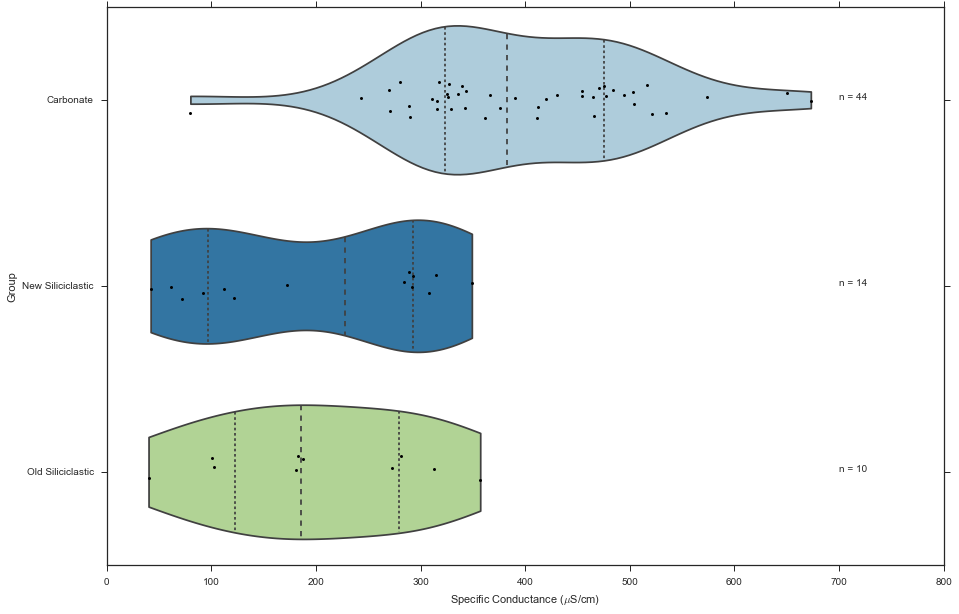

In [159]:
plt.figure(figsize=(15,10))
ax = sns.violinplot(x="Cond", y=gname, data=chem,  inner="quart", palette="Paired", cut=0)
sns.stripplot(x="Cond", y=gname, data=chem, jitter=True, size=3, color="black", linewidth=0)
for i in range(len(chem.groupby(gname))):
    plt.text(700, i, "n = " + str(cnt[-1-i]))
plt.xlabel("Specific Conductance ($\mu$S/cm)")
plt.ylabel("Group")
plt.savefig('E:/PROJECTS/POWMOW/CondViolinPlots.pdf')